In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import nltk
import re
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
import re, string, unicodedata 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
fake_job_postings_US1 = pd.read_csv('fake_job_postings_cleaned.csv')

In [3]:
fake_job_postings_US1

,Unnamed: 0,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,0,2,7,6,0,0.05,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEE...,2574
1,1,0,1,4,4,6,0,0.05,Wordpress Designer and Expert for Startup | St...,2521
2,2,0,0,2,7,6,0,0.05,"Senior Publishing Specialist US, NY, New York...",1533
3,3,1,1,1,5,1,0,0.05,"Regional Account Manager US, NY, New York Veri...",4653
4,4,0,1,2,7,6,0,0.05,"Program Manager US, NY, New York Roka Security...",1163
...,...,...,...,...,...,...,...,...,...,...
11113,11113,0,0,2,7,6,0,0.00,"Web Analytics Specialist US, WY, Cheyenne Not...",726
11114,11114,0,0,1,2,1,0,0.00,"Content Contributor US, WY, Cheyenne Not Speci...",687
11115,11115,0,0,2,7,6,0,0.00,"Content Strategist US, WY, Cheyenne Not Specif...",574
11116,11116,0,1,0,2,1,0,0.00,Graduates: English Teacher Abroad (Conversatio...,575


In [4]:
fake_job_postings_US1=fake_job_postings_US1.drop(columns=['Unnamed: 0'])

In [5]:
fake_job_postings_US1.shape

(11118, 9)

# Removing non - ASCII

In [6]:
fake_job_postings_US1['text'] = fake_job_postings_US1['text'].apply(lambda x: re.sub(r'[/(){}\[\]\|@,;.:-]',' ',x))

In [7]:
fake_job_postings_US1.text[0]

"SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEER US  NY  New York Not Specified DUTIES  Conduct research for building technical  statistical  algorithmic and math modelsto perform stocks  options and futures markets analysis  and implementing those models assoftware products that help to improve company clients’ stock and options trading  Taking partin quantitative analysis with the team of traders to build algorithmic models to optimize stocksand options trading  research and historical data analysis contributing to the generation of newtrading ideas and strategies  Developing  designing  programming and debugging the software toimplement built algorithmic models that will improve stocks and options trading and performadvanced risk management  as a standalone desktop software  and public trading platforms addons Metatrader  NinjaTrader  TradeStation   Developing technical indicators and tradingtemplates as specified by the company and its team members for TradeStation  NinjaTrader Sie

# Removing Numbers

In [8]:
fake_job_postings_US1['text'] = fake_job_postings_US1['text'].apply(lambda x: re.sub(r'\d+', ' ', x))

In [9]:
fake_job_postings_US1.text[0]

"SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEER US  NY  New York Not Specified DUTIES  Conduct research for building technical  statistical  algorithmic and math modelsto perform stocks  options and futures markets analysis  and implementing those models assoftware products that help to improve company clients’ stock and options trading  Taking partin quantitative analysis with the team of traders to build algorithmic models to optimize stocksand options trading  research and historical data analysis contributing to the generation of newtrading ideas and strategies  Developing  designing  programming and debugging the software toimplement built algorithmic models that will improve stocks and options trading and performadvanced risk management  as a standalone desktop software  and public trading platforms addons Metatrader  NinjaTrader  TradeStation   Developing technical indicators and tradingtemplates as specified by the company and its team members for TradeStation  NinjaTrader Sie

# Word Tokenization

In [10]:
fake_job_postings_US1['text'] = fake_job_postings_US1.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [11]:
fake_job_postings_US1.text

0        [SENIOR, FINANCE, SOFTWARE, RESEARCHER, AND, E...
1        [Wordpress, Designer, and, Expert, for, Startu...
2        [Senior, Publishing, Specialist, US, NY, New, ...
3        [Regional, Account, Manager, US, NY, New, York...
4        [Program, Manager, US, NY, New, York, Roka, Se...
                               ...                        
11113    [Web, Analytics, Specialist, US, WY, Cheyenne,...
11114    [Content, Contributor, US, WY, Cheyenne, Not, ...
11115    [Content, Strategist, US, WY, Cheyenne, Not, S...
11116    [Graduates, English, Teacher, Abroad, Conversa...
11117    [English, Teacher, Abroad, US, WY, Laramie, We...
Name: text, Length: 11118, dtype: object

## Removal of non-ASCII characters, Changing to lower case, removing punctuation, stopwords and Lemmatization

In [12]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import unicodedata 
import string as str

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', ' ', word)
        if new_word != ' ':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def Text_preprocess(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join (words)

In [13]:
fake_job_postings_US1['text'] = fake_job_postings_US1.apply(lambda x: Text_preprocess(x['text']),axis=1)

In [14]:
fake_job_postings_US1.text

0        senior finance software researcher engineer us...
1        wordpress designer expert startup studyhall co...
2        senior publish specialist us ny new york speci...
3        regional account manager us ny new york veripi...
4        program manager us ny new york roka security b...
                               ...                        
11113    web analytics specialist us wy cheyenne specif...
11114    content contributor us wy cheyenne specify ded...
11115    content strategist us wy cheyenne specify dedi...
11116    graduate english teacher abroad conversational...
11117    english teacher abroad us wy laramie help teac...
Name: text, Length: 11118, dtype: object

In [15]:
fake_job_postings_US1.head()

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,2,7,6,0,0.05,senior finance software researcher engineer us...,2574
1,0,1,4,4,6,0,0.05,wordpress designer expert startup studyhall co...,2521
2,0,0,2,7,6,0,0.05,senior publish specialist us ny new york speci...,1533
3,1,1,1,5,1,0,0.05,regional account manager us ny new york veripi...,4653
4,0,1,2,7,6,0,0.05,program manager us ny new york roka security b...,1163


In [16]:
fake_job_postings_US1.shape

(11118, 9)

# Saving our final dataframe

In [17]:
fake_job_postings_US1.to_csv('FakeJobPosting-Final.csv',index=False)

In [18]:
fake_job_postings_US1.shape

(11118, 9)

In [4]:
final_df = pd.read_csv('FakeJobPosting-Final.csv')

In [20]:
final_df.shape

(11118, 9)

In [21]:
final_df.head()

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,2,7,6,0,0.05,senior finance software researcher engineer us...,2574
1,0,1,4,4,6,0,0.05,wordpress designer expert startup studyhall co...,2521
2,0,0,2,7,6,0,0.05,senior publish specialist us ny new york speci...,1533
3,1,1,1,5,1,0,0.05,regional account manager us ny new york veripi...,4653
4,0,1,2,7,6,0,0.05,program manager us ny new york roka security b...,1163


In [22]:
from wordcloud import WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000, min_font_size = 10).generate(" ".join(data.values))

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 


## General Wordcloud

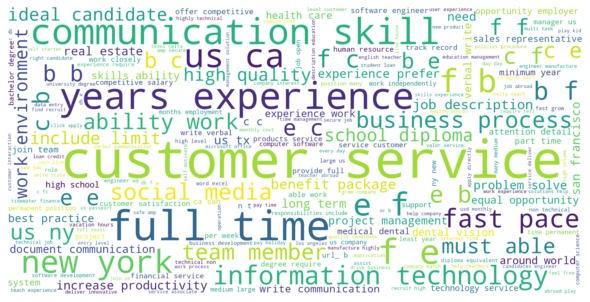

In [23]:
wordCloud_generator(final_df['text'])

## Fraudulent Wordcloud

In [24]:
fraud_jobs_text = final_df[final_df.fraudulent==1].text
actual_jobs_text = final_df[final_df.fraudulent==0].text

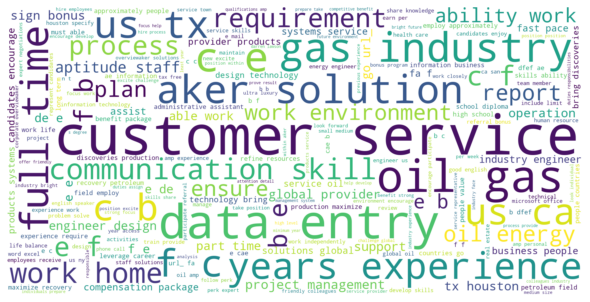

In [25]:
wordCloud_generator(fraud_jobs_text)

## Real Wordcloud

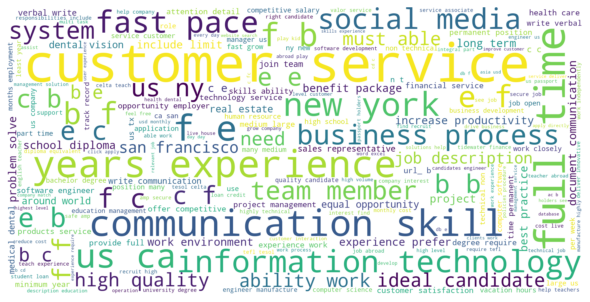

In [26]:
wordCloud_generator(actual_jobs_text)

In [27]:
final_df.head()

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,2,7,6,0,0.05,senior finance software researcher engineer us...,2574
1,0,1,4,4,6,0,0.05,wordpress designer expert startup studyhall co...,2521
2,0,0,2,7,6,0,0.05,senior publish specialist us ny new york speci...,1533
3,1,1,1,5,1,0,0.05,regional account manager us ny new york veripi...,4653
4,0,1,2,7,6,0,0.05,program manager us ny new york roka security b...,1163


# Data preparation for Modeling

In [5]:
X = final_df[['telecommuting','has_company_logo', 'employment_type', 'required_experience', 'required_education','ratio', 'text', 'character_count']]
y = final_df['fraudulent']

In [6]:
##X.to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8894, 8)
(2224, 8)
(8894,)
(2224,)


In [9]:
X_num_train=X_train[['telecommuting','has_company_logo', 'employment_type', 'required_experience', 'required_education','ratio', 'character_count']]
X_text_train=X_train[['text']]
X_num_test=X_test[['telecommuting','has_company_logo', 'employment_type', 'required_experience', 'required_education','ratio', 'character_count']]
X_text_test=X_test[['text']]



In [10]:
count_vectorizer = CountVectorizer(max_features=5000,stop_words='english')
count_train = count_vectorizer.fit_transform(X_text_train['text'])
count_test = count_vectorizer.transform(X_text_test['text'])

In [34]:
count_train.shape

(8894, 5000)

In [35]:
print(count_vectorizer.get_feature_names())

['aa', 'aaa', 'aabbf', 'aad', 'ab', 'abb', 'abc', 'abfceafd', 'abilities', 'ability', 'able', 'abreast', 'abroad', 'absence', 'absolutely', 'abstract', 'abuse', 'ac', 'academic', 'accelerate', 'accelerator', 'accept', 'acceptable', 'acceptance', 'access', 'accessibility', 'accessible', 'accessories', 'accessquiet', 'accident', 'accidents', 'accidentwe', 'accion', 'accommodate', 'accommodation', 'accommodations', 'accommodationsability', 'accommodationswillingness', 'accompany', 'accomplish', 'accomplishments', 'accord', 'accordance', 'accordingly', 'account', 'accountabilities', 'accountability', 'accountable', 'accountant', 'accountants', 'accountcommuter', 'accountslife', 'accredit', 'accrue', 'accuracy', 'accurate', 'accurately', 'accuride', 'acd', 'acf', 'achieve', 'achievement', 'achievements', 'achievers', 'acquire', 'acquisition', 'acquisitions', 'act', 'action', 'actionable', 'activation', 'active', 'actively', 'activities', 'activity', 'actual', 'actually', 'acumen', 'acupunct

/Users/Shreya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(count_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_text_train['text'])
tfidf_test = tfidf_vectorizer.transform(X_text_test['text'])

In [38]:
tfidf_train.shape

(8894, 5000)

In [39]:
print(tfidf_vectorizer.get_feature_names())

['12', 'aaabe', 'aaes', 'abbreviate', 'abbreviations', 'abcd', 'abeb', 'abee', 'absolut', 'abw', 'aca', 'acac', 'academies', 'accdf', 'accountsfluency', 'actionables', 'actionoptimize', 'adbe', 'adbrain', 'addde', 'admiistration', 'adstruc', 'advancit', 'adventist', 'adventurer', 'adyapper', 'aedf', 'afac', 'afocus', 'agentconfigure', 'agm', 'agp', 'ahfy', 'aiim', 'aiken', 'airplus', 'aiu', 'akraya', 'alamo', 'allenbradley', 'alleynyc', 'allseas', 'allways', 'alma', 'alsip', 'alsoshould', 'ama', 'amc', 'ameriplan', 'ampreva', 'analysisstart', 'ancient', 'andoperational', 'animator', 'annex', 'anotherexperience', 'antitrust', 'aob', 'applicableassist', 'applicationrole', 'applicationscomfortable', 'applicationspast', 'appurify', 'appx', 'aptana', 'aram', 'aramark', 'arbitration', 'architectjob', 'architectured', 'arco', 'arconline', 'arcsight', 'articlesinfographic', 'ascp', 'aseptic', 'ashoka', 'aspart', 'assetmanager', 'asthma', 'ata', 'atl', 'aurionprophone', 'australians', 'avex', '

In [40]:
print(tfidf_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from scipy.stats import sem
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [47]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, count_df, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

/Users/Shreya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shreya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Accuracy: 0.980 (0.002)


In [48]:
# evaluate model for tfidf
scores = cross_val_score(model, tfidf_df, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.888 (0.002)


## As the CountVector provides more accuracy compared to TFIDF using our base model LogisticRegression, we proceed our modeling with countVectorizer

## Modeling

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import warnings
warnings.filterwarnings('ignore')

### Models

In [12]:
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='linear', gamma=1.0)
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()


In [13]:
clfs = {
    'Multinomial Naive Bayes': mnb,
    'Bernoulli Naive Bayes': bnb,
    'Support Vector Machine' : svc,
    'Random Forest': rfc,
    'Decision Tree': dtc, 
    'K- Nearest Neighbors' : knc, 
    'AdaBoost': abc, 
}

### For Textual data

In [14]:
def train_classifier(clf,count_train,y_train,count_test,y_test):
    clf.fit(count_train,y_train)
    y_pred = clf.predict(count_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [15]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, count_train,y_train,count_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Multinomial Naive Bayes
Accuracy -  0.9357014388489209
Precision -  0.6656534954407295
For  Bernoulli Naive Bayes
Accuracy -  0.9046762589928058
Precision -  0.5469483568075117
For  Support Vector Machine
Accuracy -  0.97931654676259
Precision -  0.8872180451127819
For  Random Forest
Accuracy -  0.9919064748201439
Precision -  1.0
For  Decision Tree
Accuracy -  0.9820143884892086
Precision -  0.9015151515151515
For  K- Nearest Neighbors
Accuracy -  0.9348021582733813
Precision -  0.6765676567656765
For  AdaBoost
Accuracy -  0.9433453237410072
Precision -  0.8214285714285714


### For Numerical data

In [16]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale = MinMaxScaler(feature_range = (0, 1))
x_train_num = minmaxscale.fit_transform(X_num_train)
x_test_num = minmaxscale.fit_transform(X_num_test)
x_train_num = pd.DataFrame(x_train_num)
x_test_num = pd.DataFrame(x_test_num)

In [17]:
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=40)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [18]:
clfs = {
    'Multinomial Naive Bayes': mnb,
    'Bernoulli Naive Bayes': bnb,
    'Support Vector Machine' : svc,
    'Random Forest': rfc,
    'Decision Tree': dtc, 
    'K- Nearest Neighbors' : knc, 
    'AdaBoost': abc, 
}

In [19]:
def train_num_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [20]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_num_classifier(clf, x_train_num,y_train,x_test_num,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Multinomial Naive Bayes
Accuracy -  0.8934352517985612
Precision -  1.0
For  Bernoulli Naive Bayes
Accuracy -  0.8862410071942446
Precision -  0.0
For  Support Vector Machine
Accuracy -  0.8071043165467626
Precision -  0.021621621621621623
For  Random Forest
Accuracy -  0.9262589928057554
Precision -  0.7417582417582418
For  Decision Tree
Accuracy -  0.9136690647482014
Precision -  0.6401869158878505
For  K- Nearest Neighbors
Accuracy -  0.924910071942446
Precision -  0.7485380116959064
For  AdaBoost
Accuracy -  0.914568345323741
Precision -  0.7384615384615385


#### Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid_params = {'min_samples_split':[1,2,3,4],'min_samples_leaf':[1,2,3],'max_depth':[4,6,12,18],'n_estimators':[40,50,100]}

grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid_params,n_jobs=-1,verbose=3)
grid.fit(X_num_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.930 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.940 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.942 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.928 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.5s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.930 total time=   0.5s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.930 total time=   0.2s
[

[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.939 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.5s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.940 total time=   0.5s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.937 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.947 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=1,

[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.945 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.930 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.945 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.946 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=40;, score=0.942 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=40;, score=0.943 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4,

[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.943 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.943 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.937 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.949 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.939 total time=   0.5s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.5s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=

[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.942 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   0.5s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.932 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_

[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.944 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.942 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.935 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.936 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, 

[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.936 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.945 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.945 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.931 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.940 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=3,

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 12, 18],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [40, 50, 100]},
             verbose=3)

In [72]:
grid.best_params_

{'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [23]:
rfc_best_num = RandomForestClassifier(max_depth=18,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=100)
rfc_best_num.fit(X_num_train,y_train)
y_pred_num = rfc_best_num.predict(X_num_test)
accuracy_num = accuracy_score(y_test,y_pred_num)
precision_num = precision_score(y_test,y_pred_num)
print(accuracy_num)
print(precision_num)
metrics.accuracy_score(y_test, y_pred_num)

0.9622302158273381
0.8589743589743589


0.9622302158273381

In [74]:
grid_params = {'min_samples_split':[1,2,3,4],'min_samples_leaf':[1,2,3],'max_depth':[4,6,12,18],'n_estimators':[40,50,100]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid_params,n_jobs=-1,verbose=3)
grid.fit(count_train,y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.908 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.905 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.922 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.930 total time=   0.2s
[CV 4/5] END ma

[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.909 total time=   0.3s
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.911 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.917 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.918 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.909 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.902 total time=   0.3s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.906 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.918 total time=   0.3s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=4,

[CV 4/5] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.911 total time=   0.3s
[CV 5/5] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.919 total time=   0.3s
[CV 5/5] END max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.918 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.921 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.930 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.926 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.918 total time=   0.2s
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.926 total time=   0.4s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2, n_

[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   0.2s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.923 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.914 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.918 total time=   0.3s
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.925 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimato

[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.918 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.931 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=40

[CV 5/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.926 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.929 total time=   0.2s
[CV 5/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.917 total time=   0.2s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.925 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimator

[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.930 total time=   0.3s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.3s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.2s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.949 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.948 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=40;, score=0.938 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 12, 18],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [40, 50, 100]},
             verbose=3)

In [75]:
grid.best_params_

{'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [24]:
#max_depth=10,min_samples_leaf=1,min_samples_split=3,n_estimators=100
rfc_best_text = RandomForestClassifier(max_depth=18,min_samples_leaf=1,min_samples_split=2,n_estimators=50)
rfc_best_text.fit(count_train,y_train)
y_pred_text = rfc_best_text.predict(count_test)
accuracy_text = accuracy_score(y_test,y_pred_text)
precision_text = precision_score(y_test,y_pred_text)
print(accuracy_text)
print(precision_text)
metrics.accuracy_score(y_test, y_pred_text)

0.9460431654676259
1.0


0.9460431654676259

In [27]:
prediction_array = []

for i, j in zip(y_pred_num, y_pred_text):
    if i == 1 or j == 1:
        prediction_array.append(1)
    else :
        prediction_array.append(0)

In [28]:
metrics.accuracy_score(y_test, prediction_array)

0.9703237410071942

<AxesSubplot:>

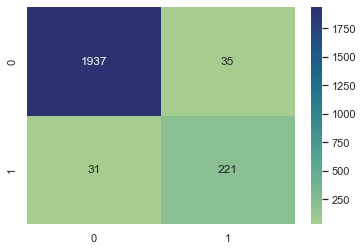

[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.944 total time=   0.2s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.951 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.951 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.951 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.931 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=2, min_samples_split=

[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.898 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.903 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.898 total time=   0.2s
[CV 1/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimator

[CV 3/5] END max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.942 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=40;, score=0.927 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=40;, score=0.940 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.929 total time=   0.5s
[CV 5/5] END max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.938 total time=   0.4s
[CV 2/5] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.952 total time=   0.3s
[CV 3/5] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.959 total time=   0.3s
[CV 4/5] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=40;, score=0.943 total time=   0.2s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_spl

[CV 1/5] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.939 total time=   0.4s
[CV 3/5] END max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.942 total time=   0.5s
[CV 4/5] END max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.930 total time=   0.5s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.951 total time=   0.2s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   0.2s
[CV 1/5] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.5s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.952 total time=   0.5s
[CV 1/5] END max_depth=18, min_samples_leaf=1, min_samples_s

[CV 1/5] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.941 total time=   0.2s
[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.947 total time=   0.2s
[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=2, n_esti

[CV 4/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.940 total time=   0.2s
[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.943 total time=   0.2s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.943 total time=   0.5s
[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.945 total time=   0.5s
[CV 4/5] END max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.933 total time=   0.4s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=1,

[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.2s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.942 total time=   0.3s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.944 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.902 total time=   0.2s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.902 total time=   0.5s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.903 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3, n_es

[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.949 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.953 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.937 total time=   0.5s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.948 total time=   0.5s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.947 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.949 total time=   0.5s
[CV 4/5] END max_depth=12, min_samples_leaf=2, min_samples_split

In [88]:
sns.heatmap(confusion_matrix(y_test,prediction_array),annot=True,fmt='g',cmap="crest")